In [1]:
from itertools import cycle, islice, product 

from DyClee.algorithms import *
from DyClee.plotting import * 
import warnings
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_blobs

In [2]:
# Load and initialize data 

# As used in DyClee paper (page 18)
num_samples = 1500 

np.random.seed(0)

# sklearn.datasets.make_circles(n_samples=100, *, shuffle=True, noise=None,
# random_state=None, factor=0.8)
#X_circles, y_circles = make_circles(num_samples, factor=.5, noise=.05)
circles = make_circles(num_samples, factor=.5, noise=.05)


# sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None,
# random_state=None)
#X_moon, y_moon = make_moons(num_samples, noise=.05)
moon = make_moons(num_samples, noise=.05)

# sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None,
# cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None,
# return_centers=False)
#X_blobs, y_blobs = make_blobs(num_samples, random_state=8)
blobs = make_blobs(num_samples, random_state=8)

# Random data
#X_random, y_random = np.random.rand(num_samples, 2), np.zeros((num_samples, 1), dtype=np.uint8)
random_data = np.random.rand(num_samples, 2), np.zeros((num_samples, 1), dtype=np.uint8)

# Store all datasets into a list along with the specified number of clusters for each
datsets = [(circles, 2), (moon, 2), (blobs, 3), (random_data, 1)]

In [3]:
# Make blobs data 
X, y = make_blobs(1500, random_state=8)

In [4]:
# Context matrix
context = get_context_matrix(X)

In [5]:
# Create dyclee class object 
dyclee = SerialDyClee(phi=0.06, context=context)

In [6]:
%%time

# Run dyclee
#dyclee.run_dataset(data=X, targetcol=y)
y_pred = dyclee.run_dataset(data=X)

Wall time: 4min 7s


In [7]:
# combine all clusters 
all_uC = dyclee.A_list + dyclee.O_list
print('There are',len(all_uC),'microclusters')

There are 96 microclusters


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

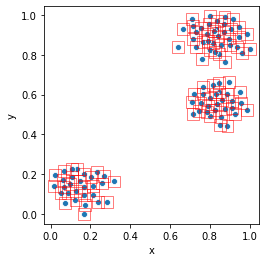

In [8]:
# plot microclusters and hyperboxes 
plot_hyperboxes(all_uC, dyclee._get_hyperbox_sizes())

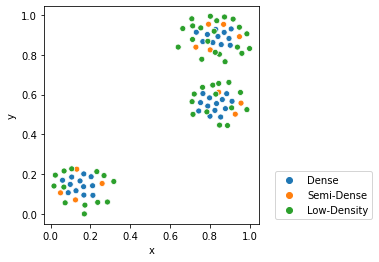

In [9]:
# plot density of microclusters 
plot_density(all_uC)

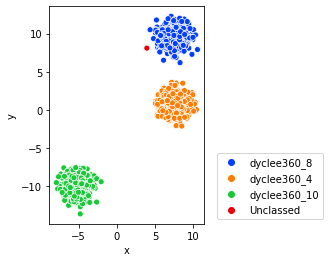

In [10]:
# plot final clustering 

cluster_df = pd.DataFrame(X, columns=['x', 'y'])
sns.scatterplot(x='x', y='y', hue=y_pred, data=cluster_df, palette='bright').legend(loc='lower left', bbox_to_anchor=(1.05,0), ncol=1)
plt.gca().set_aspect('equal')